2502004102 - Musyaffa Ayman Rafif

LB09

In [11]:
import pandas as pd
import numpy as np

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, log_loss
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [121]:
def text_cleansing(df):
    df_clean = df.apply(lambda x: str(x).lower())
    df_clean = df_clean.apply(lambda x: re.sub(r"\d+", "", x))
    df_clean = df_clean.apply(lambda x: re.sub(r'http\S+', '', x))  
    df_clean = df_clean.apply(lambda x: re.sub(r'[^\w\s]', ' ', x))  
    df_clean = df_clean.apply(lambda x: re.sub(r'\s+', ' ', x))

    df_clean = df_clean.apply(lambda x: re.sub(r'â', '', x))
    # df_clean = df_clean.apply(lambda x: re.sub(r'n', '', x))
    df_clean = df_clean.apply(lambda x: re.sub(r'ðÿ', '', x))
    df_clean = df_clean.apply(lambda x: re.sub(r'itâ', 'it', x))
    return df_clean

In [122]:
df = pd.read_excel("ctext clustering.xlsx")
df.head()

,Id,Comment
0,0x840,A few things. You might have negative- frequen...
1,0xbf0,Is it so hard to believe that there exist part...
2,0x1dfc,There are bees
3,0xc7e,I'm a medication technician. And that's alot o...
4,0xbba,Cesium is such a pretty metal.


In [123]:
df = df.drop('Id', axis = 1)
df.head()

,Comment
0,A few things. You might have negative- frequen...
1,Is it so hard to believe that there exist part...
2,There are bees
3,I'm a medication technician. And that's alot o...
4,Cesium is such a pretty metal.


In [124]:
df['Clean Text'] = text_cleansing(df['Comment'])
df.head()

,Comment,Clean Text
0,A few things. You might have negative- frequen...,a few things you might have negative frequency...
1,Is it so hard to believe that there exist part...,is it so hard to believe that there exist part...
2,There are bees,there are bees
3,I'm a medication technician. And that's alot o...,i m a medication technician and that s alot of...
4,Cesium is such a pretty metal.,cesium is such a pretty metal


In [125]:
def word_tokenize_wrapper(text):
 return word_tokenize(text)
df['Clean Text'] = df['Clean Text'].apply(word_tokenize_wrapper)
df.head()

,Comment,Clean Text
0,A few things. You might have negative- frequen...,"[a, few, things, you, might, have, negative, f..."
1,Is it so hard to believe that there exist part...,"[is, it, so, hard, to, believe, that, there, e..."
2,There are bees,"[there, are, bees]"
3,I'm a medication technician. And that's alot o...,"[i, m, a, medication, technician, and, that, s..."
4,Cesium is such a pretty metal.,"[cesium, is, such, a, pretty, metal]"


In [126]:
list_stopwords = stopwords.words('english')

def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df['Clean Text'] = df['Clean Text'].apply(stopwords_removal)
df.head()

,Comment,Clean Text
0,A few things. You might have negative- frequen...,"[things, might, negative, frequency, dependent..."
1,Is it so hard to believe that there exist part...,"[hard, believe, exist, particulars, detect, an..."
2,There are bees,[bees]
3,I'm a medication technician. And that's alot o...,"[medication, technician, alot, drugs, liver, p..."
4,Cesium is such a pretty metal.,"[cesium, pretty, metal]"


In [127]:
lemmatizer = WordNetLemmatizer()

def lemmatization(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_text = " ".join(lemmatized_tokens)
    return lemmatized_text

df['Clean Text'] = df['Clean Text'].apply(lambda tokens: lemmatization(tokens))

df.head()

,Comment,Clean Text
0,A few things. You might have negative- frequen...,thing might negative frequency dependent selec...
1,Is it so hard to believe that there exist part...,hard believe exist particular detect anything ...
2,There are bees,bee
3,I'm a medication technician. And that's alot o...,medication technician alot drug liver probably...
4,Cesium is such a pretty metal.,cesium pretty metal


In [128]:
X = df['Clean Text'].apply(word_tokenize_wrapper)

In [129]:
X.head()

0    [thing, might, negative, frequency, dependent,...
1    [hard, believe, exist, particular, detect, any...
2                                                [bee]
3    [medication, technician, alot, drug, liver, pr...
4                              [cesium, pretty, metal]
Name: Clean Text, dtype: object

In [130]:
vectorizer = TfidfVectorizer(stop_words= 'english', min_df = 5, max_df= 0.90)
# ignore terms that appear in less than 5 documents
# ignore terms that appear in more than 90% of the documents
tfidf_matrix = vectorizer.fit_transform(X.apply(lambda x: ' '.join(x)))
tfidf_val = pd.DataFrame(tfidf_matrix.toarray(),columns=vectorizer.get_feature_names_out())

In [131]:
tfidf_val.head()

,ab,abdomen,ability,able,absence,absolute,absolutely,absorb,absorbed,absorbing,...,youtube,yt,yup,zeolite,zero,zinc,œhow,œthe,œyou,žƒ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Clustering

In [132]:
distortions = []
range_k = range(2,10)
for k in range_k:
    kmeanModel = KMeans(n_clusters=k)
    labels = kmeanModel.fit_predict(tfidf_val)
    #calculate silhouette_score for each cluster
    silhouette_avg = silhouette_score(tfidf_val, labels)
    print(
        "For n_clusters =",k,
        "The average silhouette_score is :",silhouette_avg,
        )
    distortions.append(kmeanModel.inertia_)

For n_clusters = 2 The average silhouette_score is : 0.02945790884634053
For n_clusters = 3 The average silhouette_score is : 0.027157431878202208
For n_clusters = 4 The average silhouette_score is : 0.027700939128044697
For n_clusters = 5 The average silhouette_score is : 0.03186340479357531
For n_clusters = 6 The average silhouette_score is : 0.04045887978948873
For n_clusters = 7 The average silhouette_score is : 0.03828537458326877
For n_clusters = 8 The average silhouette_score is : 0.03965976196344201
For n_clusters = 9 The average silhouette_score is : 0.03189092889101534


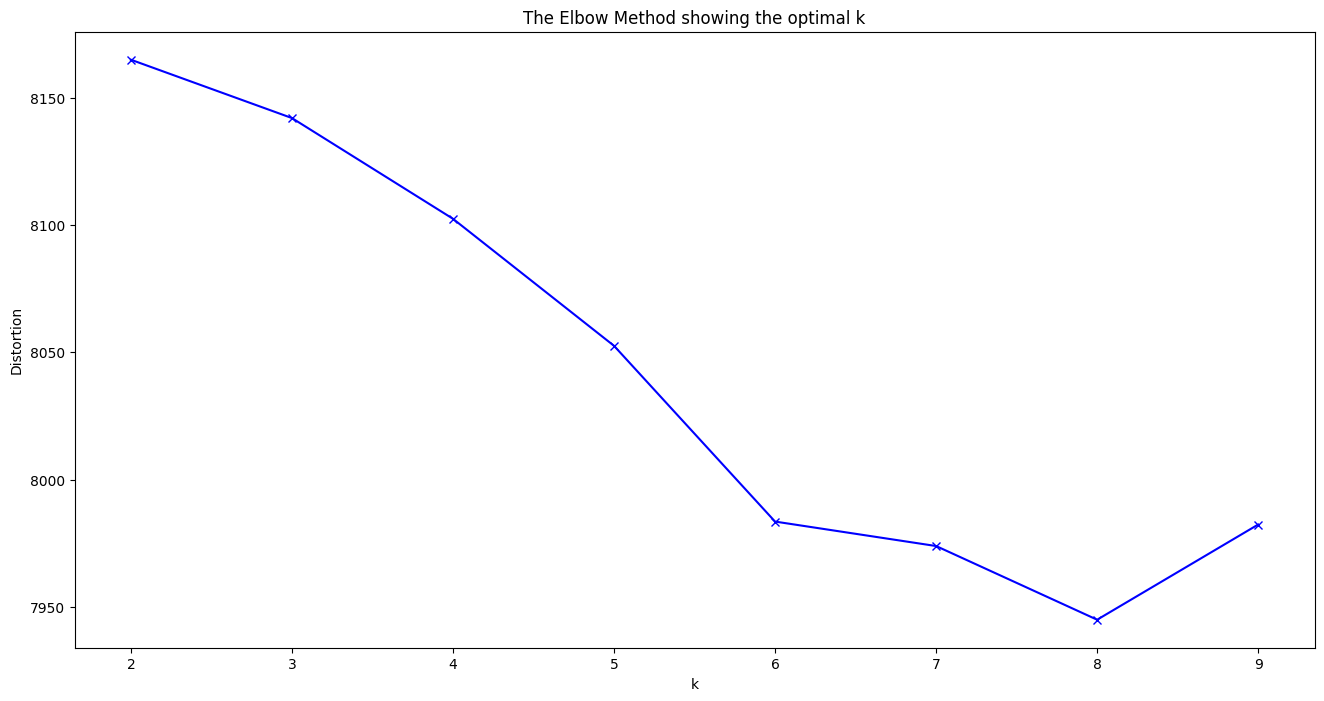

In [133]:
plt.figure(figsize=(16,8))
plt.plot(range_k, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [140]:
chosen_k = 6  
kmeans = KMeans(n_clusters=chosen_k).fit(tfidf_val)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Persona Analysis

In [141]:
cluster_words = {}
cluster_word_freq = {}

# Iterate over documents and cluster labels
for doc_idx, label in enumerate(cluster_labels):
    document_words = X[doc_idx]  # Get the words of the document
    if label not in cluster_words:
        cluster_words[label] = set(document_words)  # Initialize the cluster's word set
    else:
        cluster_words[label].update(document_words)  # Add words to the cluster's word set

    # Update word frequencies for each cluster
    for word in document_words:
        if label not in cluster_word_freq:
            cluster_word_freq[label] = {word: 1}
        else:
            if word in cluster_word_freq[label]:
                cluster_word_freq[label][word] += 1
            else:
                cluster_word_freq[label][word] = 1

# Sort words in each cluster based on frequency
for label in cluster_words:
    sorted_words = sorted(cluster_words[label], key=cluster_word_freq[label].get,
                          reverse=True)  # Sort words by frequency
    cluster_words[label] = sorted_words

# Display top 10 words for each cluster in order
for label, words in sorted(cluster_words.items()):
    print(f"Cluster {label + 1}:")
    print(words[:10])
    print()


Cluster 1:
['n', 'good', 'chemistry', 'work', 'physic', 'year', 'get', 'job', 'would', 'like']

Cluster 2:
['removed', 'post', 'name', 'god']

Cluster 3:
['like', 'look', 'n', 'would', 'one', 'sound', 'thing', 'something', 'know', 'seems']

Cluster 4:
['thank', 'thanks', 'much', 'ok', 'lot', 'help', 'reply', 'explanation', 'really', 'sense']

Cluster 5:
['n', 'would', 'one', 'get', 'think', 'like', 'time', 'make', 'know', 'also']

Cluster 6:
['day', 'let', 'n', 'live', 'one', 'get', 'think', 'would', 'like', 'need']



In [142]:
from wordcloud import WordCloud

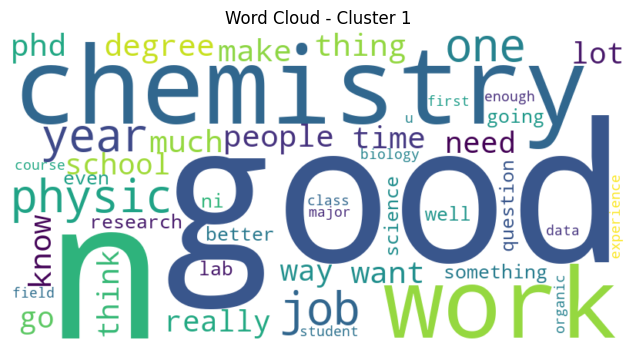

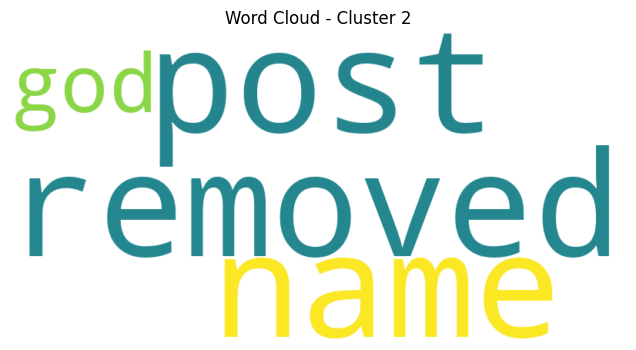

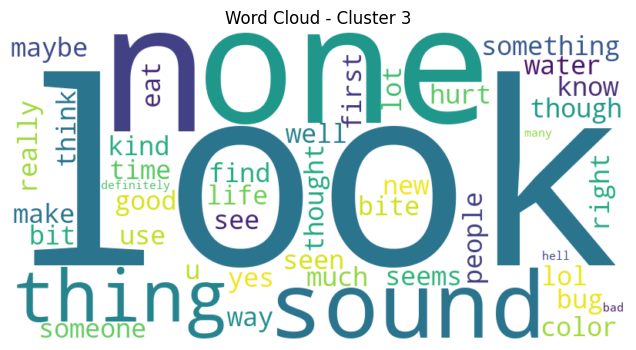

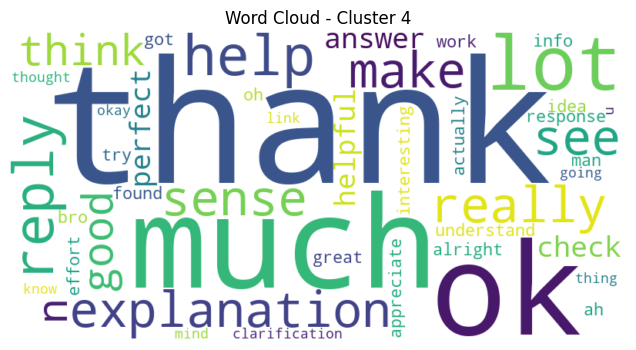

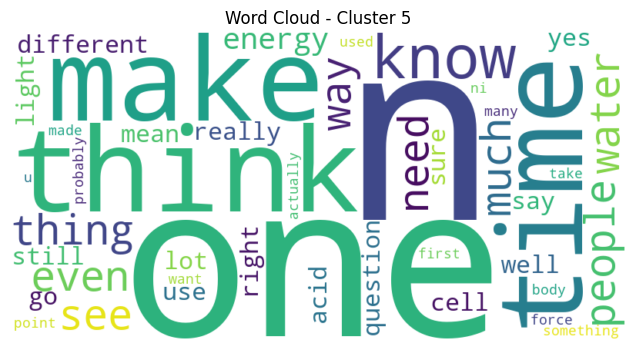

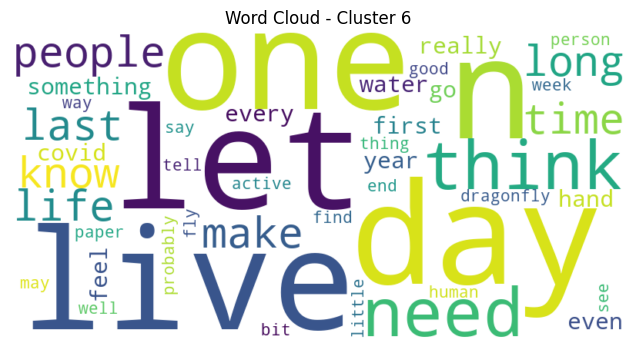

In [143]:
for label, words in sorted(cluster_words.items()):
    # Generate word cloud for the current cluster
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(words[:50]))

    # Display the word cloud
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - Cluster {label + 1}")
    plt.show()

In [146]:
df['cluster'] = cluster_labels

In [148]:
df.sample(10)

,Comment,Clean Text,cluster
6672,You can tell who actually uses quantum mechani...,tell actually us quantum mechanic regularly wa...,4
1828,Play only positive music near it,play positive music near,4
2817,"Noted, will be acidic.",noted acidic,4
3738,If you discern those in an IR spectrum you are...,discern ir spectrum wizard,4
4332,"And weâ€™re each like, waves, rippling thru th...",like wave rippling thru one field man n n bubb...,4
5712,Very true. I guess Iâ€™ll have to try. Thank you.,true guess try thank,3
875,"Not sure of the exact legality around this, bu...",sure exact legality around pretty sure right d...,4
7682,Thanks!,thanks,3
5966,Those are magic mushrooms found near Mexico. ...,magic mushroom found near mexico believe fly a...,4
4814,What's the closest truth we've got at the mome...,closest truth got moment would interested reading,4


Cluster 1:
- Keywords: good, chemistry, work, physics, year, job.
- Interpretation: This cluster may represent discussions related to work, job opportunities, and academic or professional experiences.

Cluster 2:
- Keywords: removed, post, name, god.
- Interpretation: This cluster might contain posts discussing content removal, names, and potentially religious topics.

Cluster 3:
- Keywords: like, look, would, one, sound, thing, something, know, seems.
- Interpretation: This cluster appears to contain posts discussing observations, comparisons, and expressions of uncertainty or speculation.

Cluster 4:
- Keywords: thank, thanks, much, OK, lot, help, reply, explanation, really, sense.
- Interpretation: This cluster likely represents posts expressing gratitude, appreciation, and feedback for assistance or explanations.

Cluster 5:
- Keywords: would, one, get, think, like, time, make, know, also.
- Interpretation: This cluster may involve discussions about various topics, including opinions, thoughts, and considerations.

Cluster 6:
- Keywords: day, let, live, one, get, think, would, like, need.
- Interpretation: This cluster might include posts discussing daily life, personal reflections, and needs.